<a href="https://colab.research.google.com/github/MPGarg/ERA1_Session8/blob/main/ERA1S8_LN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Transformations


In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [4]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:02<00:00, 65328777.22it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [6]:
import model
import utils

from model import *
from utils import *

## Sample Images

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

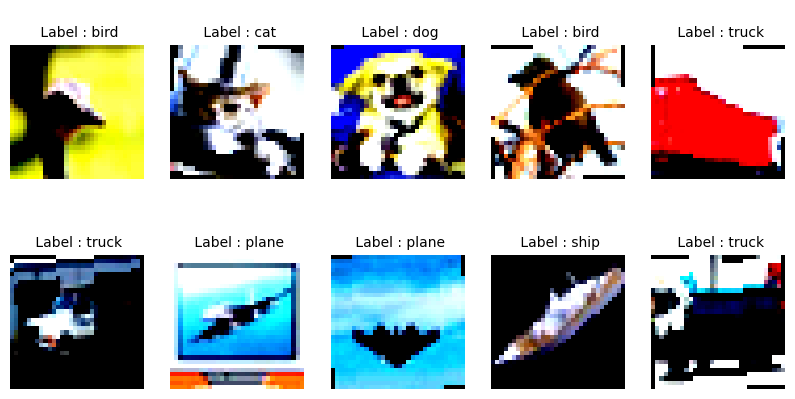

In [7]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [8]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='LN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [9]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [10]:
from torch.optim.lr_scheduler import StepLR

model =  Net(norm='LN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    #scheduler.step()
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.4273340702056885 Batch_id=390 Accuracy=33.56: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 1.4500, Accuracy: 4717/10000 (47.17%)

EPOCH: 2


Loss=1.0526044368743896 Batch_id=390 Accuracy=48.52: 100%|██████████| 391/391 [00:44<00:00,  8.72it/s]



Test set: Average loss: 1.3108, Accuracy: 5153/10000 (51.53%)

EPOCH: 3


Loss=1.3187168836593628 Batch_id=390 Accuracy=55.58: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 1.1010, Accuracy: 6062/10000 (60.62%)

EPOCH: 4


Loss=1.0689570903778076 Batch_id=390 Accuracy=59.96: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 1.0974, Accuracy: 6090/10000 (60.90%)

EPOCH: 5


Loss=1.3113776445388794 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 1.0006, Accuracy: 6466/10000 (64.66%)

EPOCH: 6


Loss=1.0109708309173584 Batch_id=390 Accuracy=64.09: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.9311, Accuracy: 6704/10000 (67.04%)

EPOCH: 7


Loss=0.739202618598938 Batch_id=390 Accuracy=65.94: 100%|██████████| 391/391 [00:50<00:00,  7.76it/s]



Test set: Average loss: 0.9759, Accuracy: 6483/10000 (64.83%)

EPOCH: 8


Loss=0.9624531865119934 Batch_id=390 Accuracy=67.51: 100%|██████████| 391/391 [00:47<00:00,  8.27it/s]



Test set: Average loss: 0.8719, Accuracy: 6955/10000 (69.55%)

EPOCH: 9


Loss=0.8335781097412109 Batch_id=390 Accuracy=68.54: 100%|██████████| 391/391 [00:45<00:00,  8.59it/s]



Test set: Average loss: 0.8591, Accuracy: 7012/10000 (70.12%)

EPOCH: 10


Loss=0.7752823233604431 Batch_id=390 Accuracy=69.49: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.8488, Accuracy: 7050/10000 (70.50%)

EPOCH: 11


Loss=0.8021133542060852 Batch_id=390 Accuracy=70.36: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]



Test set: Average loss: 0.8199, Accuracy: 7120/10000 (71.20%)

EPOCH: 12


Loss=0.9003774523735046 Batch_id=390 Accuracy=71.46: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]



Test set: Average loss: 0.8091, Accuracy: 7122/10000 (71.22%)

EPOCH: 13


Loss=0.9120820164680481 Batch_id=390 Accuracy=71.86: 100%|██████████| 391/391 [00:47<00:00,  8.18it/s]



Test set: Average loss: 0.7536, Accuracy: 7364/10000 (73.64%)

EPOCH: 14


Loss=0.7512723207473755 Batch_id=390 Accuracy=72.54: 100%|██████████| 391/391 [00:45<00:00,  8.64it/s]



Test set: Average loss: 0.7365, Accuracy: 7452/10000 (74.52%)

EPOCH: 15


Loss=0.7278159260749817 Batch_id=390 Accuracy=73.06: 100%|██████████| 391/391 [00:45<00:00,  8.61it/s]



Test set: Average loss: 0.7590, Accuracy: 7420/10000 (74.20%)

EPOCH: 16


Loss=0.8493460416793823 Batch_id=390 Accuracy=73.65: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]



Test set: Average loss: 0.7580, Accuracy: 7335/10000 (73.35%)

EPOCH: 17


Loss=0.8314142227172852 Batch_id=390 Accuracy=74.12: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 0.6963, Accuracy: 7580/10000 (75.80%)

EPOCH: 18


Loss=0.7878333330154419 Batch_id=390 Accuracy=74.35: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.6924, Accuracy: 7605/10000 (76.05%)

EPOCH: 19


Loss=0.7530676126480103 Batch_id=390 Accuracy=74.80: 100%|██████████| 391/391 [00:44<00:00,  8.74it/s]



Test set: Average loss: 0.7030, Accuracy: 7610/10000 (76.10%)

EPOCH: 20


Loss=0.7798312902450562 Batch_id=390 Accuracy=75.02: 100%|██████████| 391/391 [00:44<00:00,  8.86it/s]



Test set: Average loss: 0.6876, Accuracy: 7636/10000 (76.36%)



In [11]:
train_losses1 = [t.cpu().item() for t in train_losses]

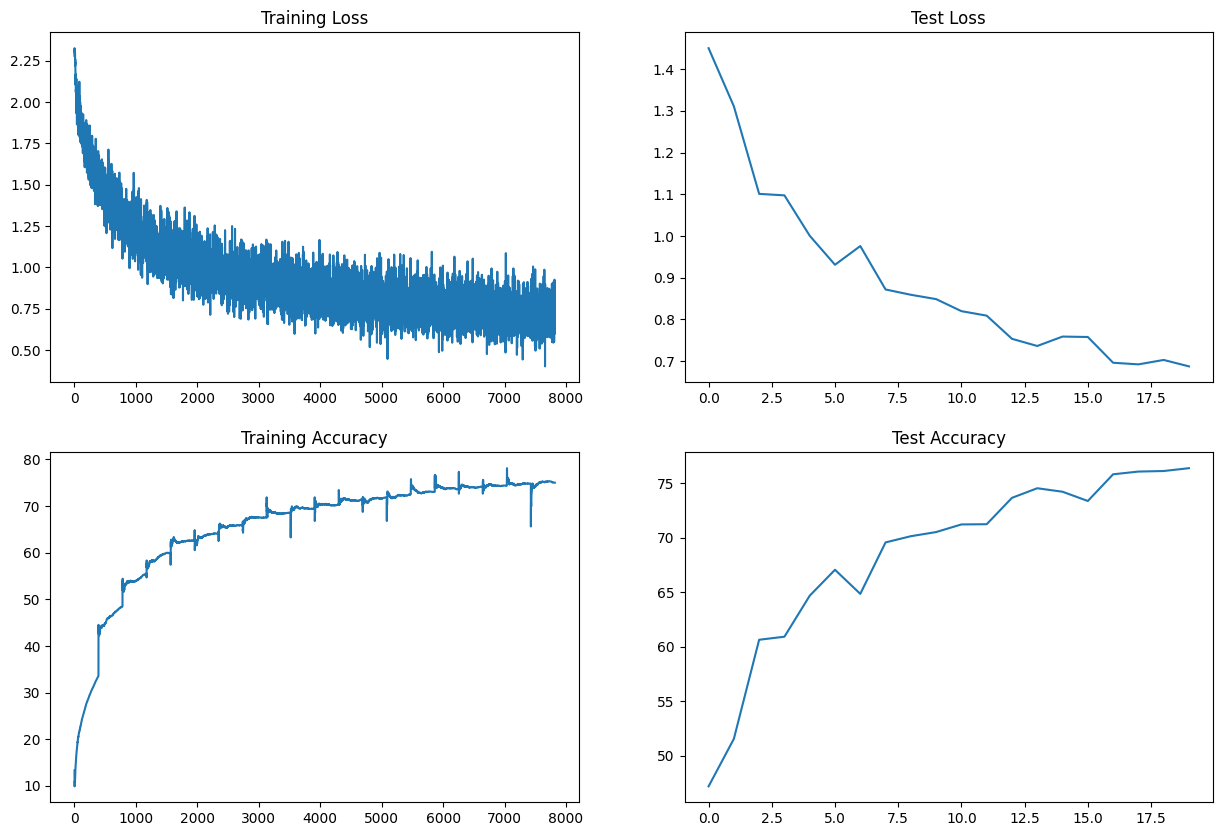

In [12]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [13]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

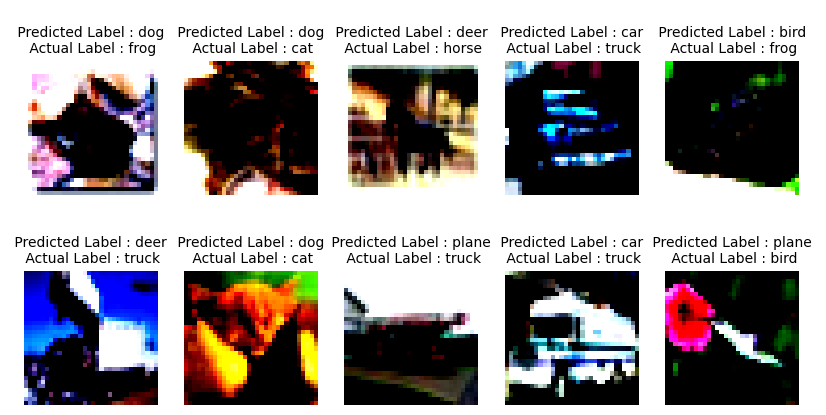

In [14]:
display_incorrect_images(wrong_prediction_list, n=10 )